# What makes neurons picky?
## Tom George, April 2020, Pehlevan Lab 

## 0. Abstract
Some neurons in the brain are highly selective to specific tasks (e.g. face cells in the IT cortex) whilst others are 'mixed selective' showing complex responses to multiple tasks and task-relevant stimuli (e.g. those in the prefrontal cortex). It is not well understood why or how neurons develop such different selectivity preferences. Here we investigate this by building deep neural networks and training them to perform, simultaneously, multiple tasks under a variety of hyperparameter, task-type and architecture regimes. A number of interesting findings are reported, cheif amomg which; deep networks show a strong capacity to actively recognise and exploit task similarity by developing mixed selective neurons when the task requirements are similar. The number of neurons also plays an important role;  networks which would otherwise learn task indepedently are forced to learn mixed selective representions when their hidden layer size is reduced. Finally, when multiple tasks are trained sequentially, as opposed to randomly training on all tasks, task-selective neurons are not developed. This suggests that although task-selective neurons may provide an optimal way to solve the problem of learning multiple tasks they are in fact unstable and vulnerable to being 'overwritten' during continual training. 

## 1. Introduction
Neurons in different regions of the brain do not all behave the same. Take the difference between the visual cortex and the prefrontal cortex; in the visual cortex neurons respond highly selectively to  specific visual stimuli ranging from oriented lines and edges in the V1 to complex shapes, textures and faces in deeper layers. If a neuron is known to respond (i.e. fire above baseline) when a face is present in a visual scene it will probably respond only weakly, or not at all, when the subject is shown, for example, an apple, or a dog. Neurons are specifically tuned to pick out one thing and one thing only.

Conversely, neurons in the prefrontal cortex (the area of the brain known to be involved in decision making and planning complex cognitive behaviours) show incredibly complex response patterns. Their firing rates have been shown to contain information about a broad range of task-relevant stimuli. To put this in context, a neuron in the PFC may be important when you are trying to remember a phone number which has just been read to you, but it is likely this neuron is also important in many other very different cognitive tasks, e.g. deciding when to cross a road.

But what causes this? Why are neurons 'mixed selective' in the PFC but 'selective' in the visual cortex. Both brain regions perform their function well but are subject to different constraints. Here I outline three tentative explanations which, among others, will guide our experiments:

- First and foremost, the space of all possible cognitive tasks the PFC might be required to perform is practically infinite. That is to say complex tasks can be composed recursively from simpler tasks ad infinitum. Compare this to the role of the visual cortex;  visual scenes (although rich and varied) are generally built from the same basic set of polygons, colours and textures. Rigotti et al (2013) showed that mixed selectivity offers a significant computational advantage over selectivity by vastly increasing the repertoir of potential input-output functions. Perhaps, therefore, mixed selectivity in the PFC is a consequence of the fact that it has to be able to perform essentially an infinite number of possible tasks and mixed selectivity is the only way, mathematically, this can be achieved. 

- An alternative hypthesis is that neurons are, by default, mixed selective, but when a task is repeatedly performed very often it becomes efficient to dedicate a neuron (or a subset of neurons) to performing just that task (in the same way we might dedicate a special folder on our hardrive to storing only college work, or a room in our house to cooking). Perhaps, then, the visual cortex contains selective neurons because tasks such as recognising faces, emotions, family members or food types are performed regularly and have been throughout evolution. This argument can be extended to a higher level; perhap highly specialised brain regions (the visual cortex, the motor cortex, the olfactory cortex etc.) developed throughout evolution because otherwise more-generalised computing regions in the brain were becoming overwhelmed by having to repeatedly perform the same tasks over-and-over again. 

- Finally, how we learn may be just as important as what we learn. Consider the following two scenarios for learning two tasks. In scenario 1 we practise task A and task B, randomly alternating between the two, until we're good at both. We will call this 'random training' similar to how we might learn Spanish and Maths alongside each other during our school years. In scenario two we only practice task A until we have perfected it and then we start learning task B. We will call this 'sequential learning' similar to how our parent might teach us how to ride a bike and then, the following week, how to use chopsticks. In a 2019 paper Yang et al. trained a complex RNN model of the PFC on 20 cognitive tasks and found highly mixed selective neurons when the network was trained sequentially (task 1…then task 2…then task 3…), matching what is found in the PFC  [Mante et al. (2013)]. Conversely, they found task-selective neurons when the RNN was trained randomly on all tasks. Perhaps, therefore, the mixed selectivity observed in the PFC is a consequence of how we learn complex cognitive tasks as children: in a blocked, sequential fashion. Compare this to vision where, from the day we open our eyes, we are presented with a cacophony of visual scenes and objects in, basically, a random order. 

In this project I want to explore and test these hypotheses from a computational perspective. To do this we will build a deep neural network and train it on multiple tasks, simultaneously. The idea is to challenge the network to do what the brain does (i.e. perform multiple tasks with a single 'neural network') and then study how it does it. We can analyse the hidden neurons to see whether they are mixed-selective or selective and test what affects this. It's not meant to be a detailed biologically plausible replica of any single brain area but rather the simplest model from which we can probe neuronal selectivity and the parameters which effect this. The experiments and results are presented in the following way:

- In section 2 we train a small neural network on two simple tasks, adding and muyltiplying two numbers. Making the model very simple and training it on trivial tasks has two advantages: firstly we can attempt to understand what is going on with relatively few other distractions or complications. Secondly, since the models are simple, they are cheap to train and we can accumulate the analysis of many (e.g. 100) trials to get a statistically smooth picture of how the network behave, independent of any random initialisation effects.
 - Subsections 2.1 to 2.6 display 6 different experiments and their results respectively.
 
- In section 3 we build a much more complex model (including, importantly, convolutional layers) and train it simultaneously on four versions of the MNIST task. Being a more complex model trained on four (not two) harder tasks it is more diffcult to inpterpret what exactly is going on although some interesting results can be infered. 

- Section 4: Conclusions.

- Section 5: Code availability. 

- Section 6: References.

Note: most of the results in this report are calculated 'live' by the code displayed in the Jupyter notebook. Some supplementary figures are also supplied to aid explanations. It is hoped this will not only present the results in an exiting way but also provide a tutorial/roadmap for how others can use the code and the sorts of experiments it is capable of. 

## 2. Simple model trained on simple tasks
To start we will train a very simple model on very simple tasks. For this purpose we will build a vanilla deep neural network with just two input neurons and one output neuron. The purpose is to learn, simultanously, to add and multiply the two inputs. Along with the numerical inputs  we pass a task-context input; this is a one-hot vector ([1,0] for task 1 and [0,1] for task 2) informing the network which task to perform on a given run. The model has four hidden layers and is trained by batch back propagation. It is also (until we change this later on) heavily over-parameterised with 100 hidden units in each layer. 

- Task 1: $x_0 + x_1$

- Task 2: $x_0 \cdot x_1$

The model class $\texttt{simple_network}$ in $\texttt{networks.py}$ does this. It is initialised with a list of mostly self-explanatory hyperparameters. The following figure schematically shows the experimental setup. 

![title](Figures/setup.png)

In [1]:
import numpy as np
np.seterr(all='ignore')
from networks import simple_network, MNIST_network
from utils import plot_training, plot_RI, plot_lesion_test, train_multiple
simple_hyperparameters = {'N_train' : 1000, #size of training dataset 
                          'N_test' : 100, #size of test set x
                          'lr' : 0.001, #SGD learning rate 
                          'epochs' : 10, #training epochs
                          'batch_size' : 10,  #batch size (large will probably fail)           
                          'context_location' : 'start',  #where the feed in the task context 'start' vs 'end'
                          'train_mode' : 'random', #training mode 'random' vs 'replay' 
                          'second_task' : 'prod', #first task adds x+y, second task 'prod' = xy or 'add1.5' = x+1.5y
                          'fraction' : 0.50, #fraction of training data for tasks 1 vs task 2
                          'hidden_size' : 50} #hidden layer width

simple_model = simple_network(simple_hyperparameters)

Now train the model and plot the training accuracy on both tasks throughout training. In fact the analysis is better if we train a large number of models and plot the average result. A model is saved if and only if the testing error on both tasks is less than some threshold (0.05) after training.  

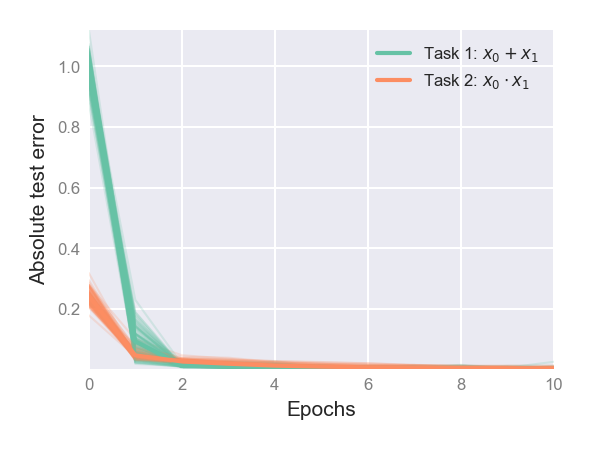

In [2]:
N_models = 100
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models1)

### 2.0 A mathematical definition of 'selectivity'
We now have multiple trained models which can perform both of the two tasks. But how do we know the selectivity preferences of the hidden neurons?  For this we define the 'importance', $\mathcal{I}_i(A)$, of neuron $i$ on task A. Intuitively we will define this as the squared change in the expected loss function (over task A's test set) when the hidden neuron, $i$, is set to zero:
\begin{equation}
\mathcal{I}_i(A) = \mathop{\mathbb{E}}_{z\sim\mathcal{D_{A}}}\big[   (\ell(z;\mathbf{h}) - \ell(z;\mathbf{h}_{h_{i}=0}))^2 \big]
\end{equation}
Here $\mathbf{h}$ represents a vector containing the state of all hidden neurons in the network, and $\mathbf{h}_{h_{i}=0}$ represents the same network where $h_i$ is set to zero and then the effect of this is propagated forwards. We can Taylor expand the loss function about $\mathbf{h}$:
\begin{equation}
\ell(z;\mathbf{h}_{h_{i}=0})  = \ell(z;\mathbf{h}) + (\mathbf{h}_{h_{i}=0} - \mathbf{h})^{\mathsf{T}}\frac{\partial \ell}{\partial \mathbf{h}} + \frac{1}{2} (\mathbf{h}_{h_{i}=0} - \mathbf{h})^{\mathsf{T}} \mathsf{H} (\mathbf{h}_{h_{i}=0} - \mathbf{h}) + ...
\end{equation}
To first order, therefore, the importance of a neuron is given by: 
\begin{equation}
\mathcal{I}_i(A) \approx \mathop{\mathbb{E}}_{z\sim\mathcal{D_{A}}}\bigg[ \bigg(h_i \cdot \frac{\partial \ell}{\partial h_i}\bigg)^2 \bigg]
\end{equation}
The reason we make this approximation is that, on most accounts it is a fairly accurate approximation of the importance but is also much cheaper to calculate using the pytorch $\texttt{.grad()}$ function on the hidden layers.

To study whether a neuron is selective to one task or mixed selective we will define the 'relative importance', $\mathcal{RI}_i(A,B)$, of neuron $i$ over tasks $A$ and $B$:
\begin{equation}
\mathcal{RI}_i(A,B) = \frac{\mathcal{I}_i(A) - \mathcal{I}_i(B)}{\mathcal{I}_i(A)+ \mathcal{I}_i(B)}
\end{equation}
If the relative importance is close to 1 then we can assume the neuron is important for task A and unimportant for task B - vica versa if $\mathcal{RI}_i(A,B)$ is close to -1. If $\mathcal{RI}_i(A,B) \approx 0$ then the neuron is equally important to both the tasks. By plotting a histogram over all the neurons in a hidden layer (and over many identically trained but independently initialised models) we can get a broad picture of how the computational effort required to solve the two tasks is shared amongst the neurons i.e. whether the neurons are generally "mixed selective" and therefore cluster around $\mathcal{RI} = 0$ or generally "selective" whereby we would expect two clusters around $\mathcal{RI} = 1$  (task 1 neurons) and $\mathcal{RI} = -1$ (task 2 neurons). Synthetic example hitograms are shown below: on the x-axis of each plot is the relative importance. On the y-axis is the proportion of neurons with that corresponding $\mathcal{RI}$. The colour smoothly changes from green on the right (representing neurons which are mostly important for task 1 but not task 2) to orange on the left (representing neurons which are mostly important for task 2 but not task 1). In the code the $\texttt{plot_RI()}$ function plots these histograms for all hidden layers (input/output layer not shown). 

![title](Figures/sampleRIhistograms.png)

### 2.1 Standard Experiment 

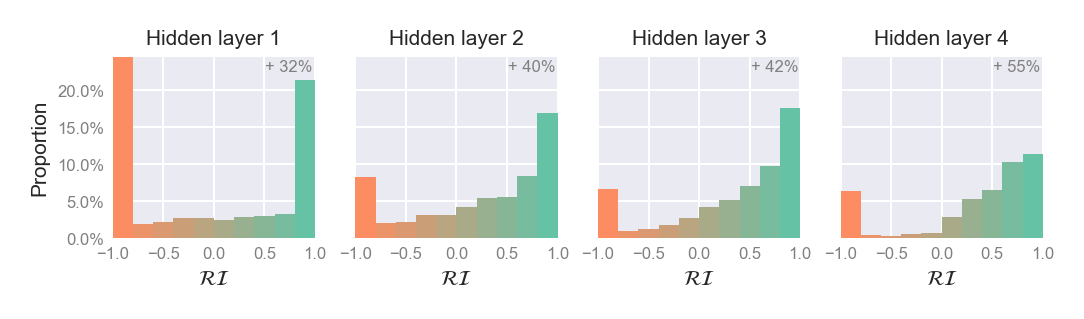

In [3]:
plot_RI(models1)

![title](Figures/exp1.png)
The percentage in the top right corner shows the proportion of neurons which are not important for either task 1 or or task 2 and so do no show in the histogram.

In the first layer the FTV is strongly bimodal. Most neurons are either exclusively important for task 1 or for task 2 and relatively few neurons are mixed. This trend continues as we go deeper through the network layers, essentially two almost independent subnetworks have been built to solve the two tasks respectively as is shown schematically in the figure beneath the plots. The task context input acts as a toggle switch, turning on/off the required/unrequired subnetworks. 

To reiterate what we have observed here, the network has learnt the two tasks by, essentially, builidng two independent and non-interating networks - one for each task. Which network is used is decided by the context vector. 

If this result (a "shattering" of the network into two sub-networks) seems trivial to you, well perhaps it is! Most people would agree this strategy intuitively makes sense, with enough neurons a network could potentially learn any number of tasks this way. But note this is not the only way to solve two tasks, as you are about to see in the next secetion. 

### 2.2 Similar vs Different tasks 
Now let try a different second task. Finding the product of two numbers (task 2) is  quite different to finding their sum (task 1). But what if we make the second task more similar to task 1 i.e. also an addition but instead of $x_0 + x_1$ task 2 is to find $x_0 + 1.5x_1$). Will this make a significant difference?

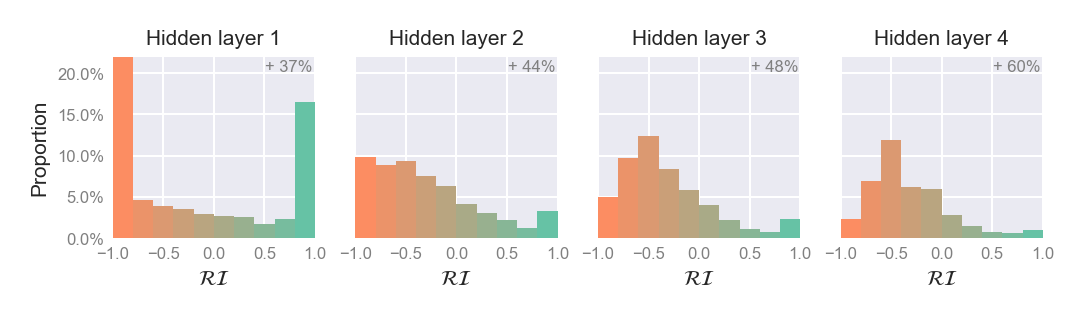

In [4]:
simple_hyperparameters['second_task'] = 'add1.5'
models2 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_RI(models2)

![title](Figures/exp2.png)

In fact, the answer is yes - it does make a huge difference. When the second task is made to be bery similar to the first task the neurons downstream from the first hidden layer are, generally, very mixed selective (shown by the unimodal 'hump' in the middle of the histograms). This is quite interesting, particularly as the difference is so stark compared to before, when the second task was to find the product of the two numbers. 
Now the bimodality in the initial layer is rapidly lost as we go deeper into the network and the $\mathcal{RI}$ distribution becomes unimodal. What we can conclude here is that the network effectively 'learns' that the two tasks it is meant to perform are effectively the same and so shares the computational effort amongst the neurons. Intuitively this makes sense as there is no point learning the same thing twice. On the other hand it is remarkable that such a simple network can learn to recognise and exploit when two tasks are similar. This leads to some interesting quetions regarding when we define two tasks as "similar" which we will not discuss here. 

This result holds true in all the experiments which were attempted (not all shown): when tasks are "similar" we get more mixed-selective neurons than when the tasks are "different".

### 2.3 Constraining the network
We now wish to test what may seem to be an intuitive assumption: if the network is made to be very small, will it be forced to learn mixed selective representations? In other words, maybe there simply isn't enough capacity to learn two independent subnetworks (one for each tasks) and the neurons are forced to be mixed selective to save space. To test this we will decrease the size of the hidden layer from 100 to 5. 

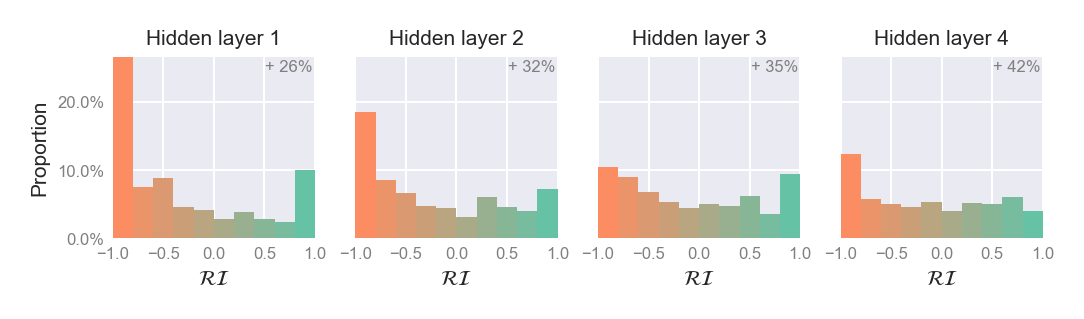

In [5]:
simple_hyperparameters['second_task'] = 'prod' #reset from previous experiment
simple_hyperparameters['hidden_size'] = 5
models3 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_RI(models3)

![title](Figures/exp3.png)

Our intuitions have been confirmed since the neurons are now, mostly, mixed selctive in hidden layers after the first (or at least more mixed-selective than in experiment 1, now the RI histogram looks flat as opposed to bimodal). It appears network capacity is an import factor in determining how tasks are solved. 

This raises an important point which is regularly overlooked when neural networks are being designed: the capacity of the neural network not only determines *whether* the task(s) in question will be solved but it can affect *how* that task is solved - a heavily overparametrised neural network may be more inclined to learn two tasks independently without recognizing their deeper shared structure.   

Finally, note that this is essentially Rigotti's argument confirmed computationally. Mixed selective neurons are useful when capacity is an issue (either because we have too many tasks to learn or because our network is too small).

### 2.4 Context location
Where we feed in the 'task context' vector  might matter. There is certainly a lot of discussion in the neuroscience community about task context information and how this is handled. A dominant theory is that the PFC acts as a 'context cortex' (see Cohen et al., 2001) sending signals to the primary sensory cortices telling them which information to concentrate on and which to ignore (we can ignore the colour of the sky when crossing a road, for example). What will happen in our simple network if we only pass the context vector in at the penultimate layer rather than the first later as it has been up until now? 

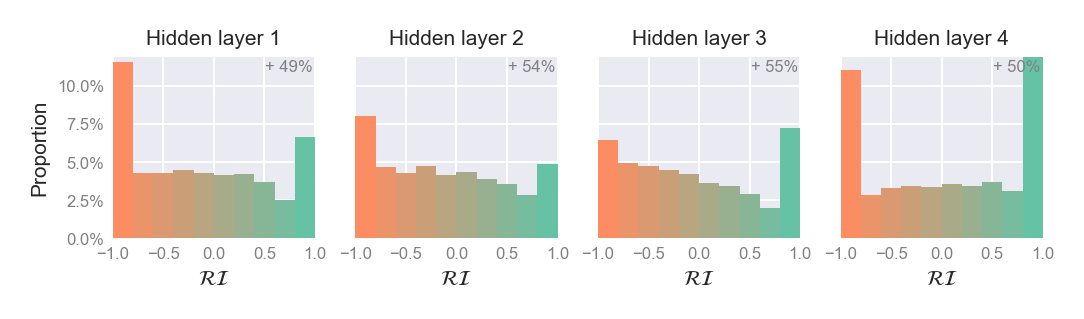

In [6]:
simple_hyperparameters['hidden_size'] = 100 #reset from previous experiment
simple_hyperparameters['context_location'] = 'end'
models4 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_RI(models4)


![title](Figures/exp4.png)

The initial layers are largely mixed selective whilst the final hidden layer (layer 4, just after where the context has been added) is strongly selective. This is similar to what we observed in the standard experiment whereby the context vector acts so as to split the network into two non-overlapping subnetworks downstream from it.

If we look closer there is more to observe. What is more interesting here is that context information can flow *backwards*, as seen by a surplus of neurons in early hidden layers which are entirely selective to just task 1 or task 2. Even though 'which task' information is never given until layer 4 neurons in layers 1, 2 and 3 learn to specialise to one task or the other, this is the power of backpropagation which can pass task-relevant information back into earlier layers by backpropagating the gradient of the loss. This finding has some interesting consequences: it is commonly believed in machine learning that early layers in neural networks generally act as 'feature extractors' whilst later layers merely regress or classify these features. This may well be the case but the above finding suggests that these 'feature extractors' (and therefore the features they extract) need not be task independent and can be specialised even if the task context if not given until  further downstream. This may have some implications for transfer learning and convolutional techniques. 


### 2.5 Training style: Random vs Sequential

Up until now training has been 'random' whereby each training batch contains a randomly selection of samples from both tasks.  Often this is not how people learn. Usually people learn tasks in chunks, this type of learning is called continual learning or sequential learning. In sequential learning we train entirely on one task and then, afterwards, train entirely on a different task. Often in machine learning this second phase results in 'catastrophic forgetting' of the first task and to avoid this there are a number of remedies. Here we will use a simple 'replay technique' where during the second phase of training on task 2 every 10th iteration (or strictly speaking every 10th batch) we train once on the original task so as not to forget it. Later, in section 3, we use a more advanced continual learning technique known as elastic weights consolidation. 

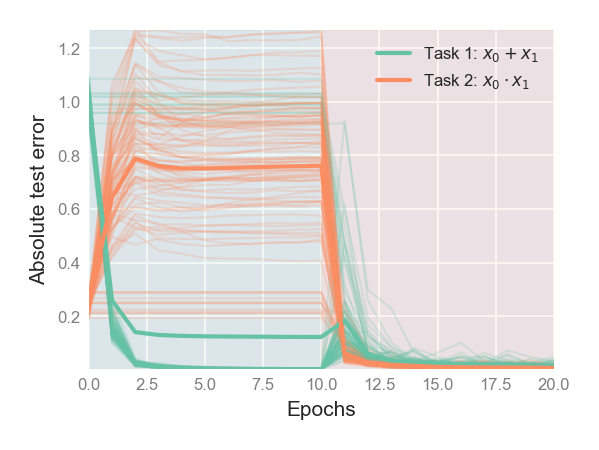

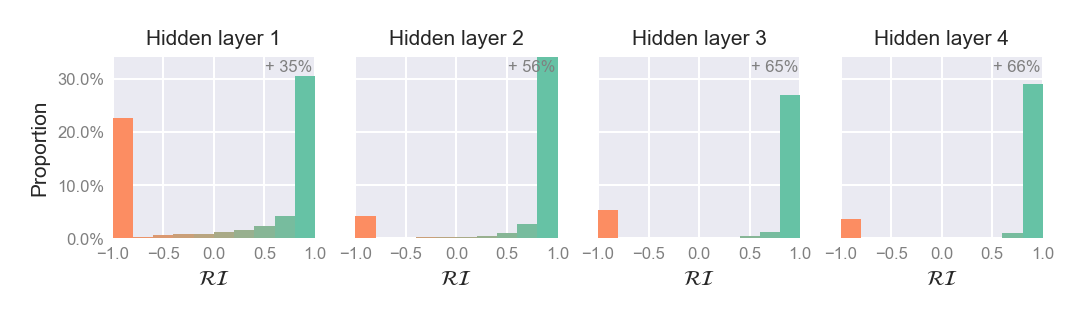

In [7]:
simple_hyperparameters['context_location'] = 'start' #reset from previous experiment
simple_hyperparameters['train_mode'] = 'replay'
models5 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models5)
plot_RI(models5)

In the training plot the shading represents what task is being trained at that current point. The result seems to suggest that continual learning encourages neurons to learn selective representations of tasks. Perhaps this is explainable because, whilst training the first task the weights and biases fall into a deep local optima for the first tasks from which (thanks to the replay during phase 2) they do not escape. Task 2 can only then be solved by an entirely different set of neurons which is not part of the optimal subset used to solve task 1.

In fact, in section 3 with the more complex model, we will observe the exact opposite of this result and we will discuss why this might be. 

### 2.6 Training bias 
This is the final experiment we will do with this simple model. So far, we have trained equally on task 1 and task 2, but what if we strongly bias towards one or the other? We discussed how it is logical that this might encourage selectivity since it might be efficient to dedicate neurons to tasks which come up very often but in reality does this happen? We can now check by simply repeating training but biasing the train dataset towards one of the tasks. We will set the second task to be 'add1.5' so that the default performance is mixed selective. The bias fraction is controlled by the hyperparameter 'fraction'.

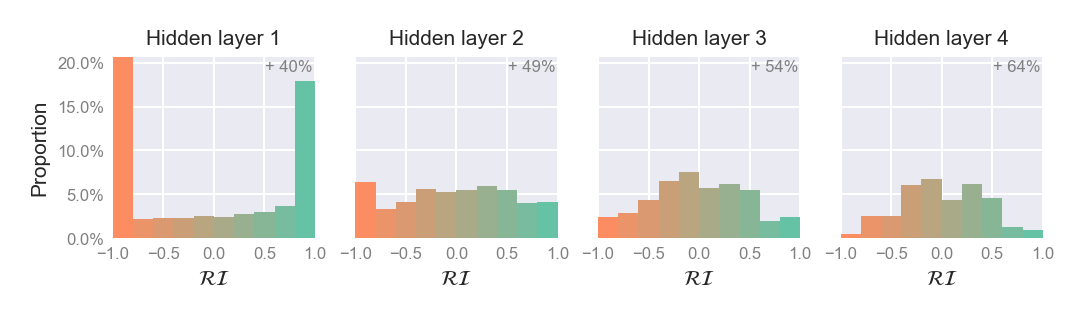

In [8]:
simple_hyperparameters['train_mode'] = 'random' #reset from previous experiment
simple_hyperparameters['second_task'] = 'add1.5'
simple_hyperparameters['fraction'] = 0.2
models6 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_RI(models6)

The following figure compares the final layer RI histograpms for 3 values of the training bias: 50:50, 80:20, 20:80 (using equivalent experimental data obtained earlier): 
![title](Figures/exp6.png)
When the training is biased 20:80 in favour of task 2 the unimodality of the RI histograms is not lost but the hump seems to shift towards task 1 i.e. to the right. That is to say more neurons become more important for task 1. The opposite is true when we bias towards task 1. This is an interesting result as, intuitively, most people would say "if we train more on task 1 than task 2 more neurons will be devoted to task 1 than task 2"...but in fact the opposite is true! If we think about it for a second this is an intelligent strategy: if we encounter task 1 much more frequently than task 2 then we have more time and samples to learn task 1 very efficiently with only a small number of neurons. Doing so would be smart as this would free up capacity to learn task 2 on a large neural network. The inuition is as follows: if we aren't able to practice performing a task very often it is sensible to at least designate a large number of neurons to performing it, that way when we do practise it we will have the best and easiest chance of actually learning it. Although this intuition might make logical sense it is a remarkably intelligent "strategy" to have emerged from this simple architecture.  

Finally, this result tentatively casts doubt on the idea that neurons specialise when a task is encountered frequently. If this were true we would have expected to see the hump shift the other way, towards the more frequent task. 

## 3 Complex CNN trained on MNIST tasks
Now lets turn our attention to more complex learning scenarios. In section 2 the tasks were trivial (merely adding or multiplying two numbers) and there was only two of them. As a result the trained networks had no way near the complexity of the human visual or prefrontal cortex. A sensible 'next step' is to increase the number of tasks, increase the complexity of the tasks and increase the complexity of the neural network model to see if the above findings hold true in a more complex setting. So lets do that. Here we build a deep convolutional neural network comprising of two convolutional layers followed by two fully connected hidden layers and train it to learn, simultaneously, 4 versions of the MNIST tasks. The four tasks all involve classfying an MNIST digit image into one of two categories: odd or even (task 1), less than 5 or greater than/equal to 5 (task 2), prime or not prime (task 3) or, again, odd or even but now not all digits are included (task 4, a subset of task 1). The exact way these tasks are defined is not what is important, rather now the network has to handle more than just two of them and each tasks is a combination of image recognition and classification according to some arbitrary task rule. "Which-task" information is again provided by the task context vector which is passed into the neural after the first fully-connected hidden layer - essentially the first half of the network should do the feature extraction and the second half (after the context) classfies these features (although as we now know from experiment 2.4 that the feature extraction may not be task-context independent). The tasks and the network architecture is shown in the following figure (the needle is again present to demonstrate a hypothetical electrode which we can use to probe the selectivity preferences of the hidden neurons, which, in this section we will only do in the final hidden layer).
![title](Figures/CNNsetup.png)
In this section we will perform two experiments:
- Section 3.1: We train all 4 tasks randomly/simultaneously 
- Section 3.2: We train the tasks sequentially using a continual learning technique known as elastic weights consolidation to (attempt to) prevent so-called catastrophic forgetting. 

### 3.1 Randomy training on all tasks 
Here we train for 8 epochs where each training batch contains a random selection of training samples from all four tasks. To get statistically steady result we must train a large number of models, approximately 20 works well,  which can take over two hours on an average CPU. To get around this I have provided the code that would (in principle) perform this experiment but commented it out and instead uploaded the results from an identical experiment I ran earlier as image files.

In [9]:
MNIST_hyperparameters = {'hidden_size' : 16,
                          'epochs' : 8,    
                          'task_sets' :  [[ [0,2,4,6,8] , [1,3,5,7,9]   ],  #task 1
                                          [ [0,1,2,3,4] , [5,6,7,8,9]   ],  #task 2
                                          [ [2,3,5,7]   , [0,1,4,6,8,9] ],  #task 3
                                          [ [0,4,8]     , [1,3,9]       ],  #task 4 
                                         ],
                          'is_CNN' : True, #False reverts to a purely fully connected NN 
                          'train_mode' : 'random', #'random', 'sequential' or 'ewc'
                          'sample_size' : 200, #sample size for calculating fisher matrix in ewc 
                          'importance' : 1000, #ewc 'importance' parameter 
                          'batch_size' : 64,

                         'lr' : 0.001}   
#models7 = train_multiple('MNIST_network', MNIST_hyperparameters, N_models=20) 
#plot_training(models8)
#plot_RI(models8)

![title](Figures/MNISTexp1.png)
The 6 histograms on the right are the relative importance plots. Whereas before we had only two tasks to compare (in a single plot) now we have four tasks (or 6 pairs). They show selectivity preferences for neurons in the penultimate fully connected layer only. As we can see on the left the training was successful and, in nearly all models, all tasks were learned correctly.

Most of the RI plots are trimodal. Take the task 1 vs task 2 plot in the top left: a large proportion of the neurons are task-selective (the peaks on the left and the right) but a large proportion are mixed (the peak in the middle). This can be rationalised nicely by considering the tasks in question: task 1 and task 2 have partial overlap and a network already trained on task 1 would correctly label digits 0, 2, 4, 5, 7, 9 from task two. Only digits 1, 3, 6 and 8 conflict. One possible explanation is that the mixed-selective neurons cover the digits which are labelled the same between the tasks whilst the selective ones are learnt to account for those that differ. 

Next look at the task 1 vs task 4 plot in the top right. Remember that task 4 is a pure subset of task 1 (i.e. very similar); the network contains only mixed selective neurons implying that (just like we found in part 2) it has recognized and exploited the fact that task 4 and task 1 are similar and developed neurons which solve both (there's no need to learn two policies which do essentially the same thing!)

Both these result support the hypothesis that the penultimate layer neurons could effective encode "digit-label" pairs. Between two tasks any digits which are assigned the same label (for example 0, 2 and 4 are both even AND less than 5) recruit the same "digit-label" neurons. This hypothesis remains to be tested directly (also the encoding can't be explicit since there are 20 possible digit label pairs but only 16 neurons in the hidden layer). 

## 3.2 Continual training using Elastic Weights Consolidation
When neural networks are sequentially trained on multiple tasks they typically "forget" early tasks as the weights are reoptimised towards the new task. This phenomena is knows are "catastrophic forgetting". In the previous section we overcame this relatively simply by replaying old tasks infrequently during new task training however this simple method may not work for our new complex tasks, not to mention it is 'cheating' since we must store instances of previous tasks in memory to retrain on - something which, generally, may not be possible. This is still an open problem in machine learning however current state-of-the-art performance is achieved by an algorithm known as elastic weights consolidation (EWC). EWC applies a quadratic penalty to the loss proportional to how far the weights have drifted from their "optimized" values when measured at the end of training on the previous task(s). The penalty is also proportional to how important that weight was to completing the previous task(s) measured by the Fisher information matrix (similar to how we measure importance, $F_i$ is proportional to the derivative of the loss with respect to this weight). Schematically this is shown in the figure below: 
![title](Figures/ewc.png)
The result of this penalty is that only the weights which are unimportant for previous tasks are used to optimse the new task preventing old tasks from being overwritten. We wish to know what effect this has on the neuronal representations: does sequential learning (enabled in this manner) encourage or discourage selective neurons and if so, why? For this I implemented the EWC algorithm, something which can be toggled with the hyperparameter 'train_mode' = 'ewc'. 

In [10]:
MNIST_hyperparameters['train_mode'] = 'ewc'
#models8 = train_multiple('MNIST_network', MNIST_hyperparameters, N_models=20) 
#plot_training(models8)
#plot_RI(models8)

![title](Figures/MNISTexp2.png)
Now there are four distinct training phases corresponding to learning each of the four tasks sequentially. After a task has been learnt and training begins on a new task the performance on the old tasks generally begins to fall, i.e. it is 'forgotten'. The EWC algorithm, although far from perfect, does appear to slow the "forgetting" of previous tasks (try setting 'train_mode' to 'sequential' i.e. without EWC, and you will see much more severe forgetting). The following figure places the RI plots for random vs sequential EWC learning side-by-side for easy comparison. 
![title](Figures/mnistcomparison.png)
The comparison figure highlights that when training is sequential, rather than random, the neurons differ in one very clear way: selective neurons are not present for task pairs that don't contain the very final task (task 4). We hypothesis is that selectivity, although optimal, is unstable. Those neurons which are selective are easily overwritten when we move onto training a new task. 

We might then wonder why selective neurons are so unstable? This remains to be fully understood, a physicist would answer that being entirely selective to one task and one task only puts that neuron in a 'low entropy' state from which, without careful treatment, it will easily slip out of. Furthermore, since it is only important for a single task, the EWC penalty asociated with changing the weights surrounding it is smaller than for a neuron which is important for many tasks, something which might allow it to be recruited for new tasks trained *after* the one it was originally specialised for. 

## 4 Conclusions 
There are five main conclusions we can draw from these experiments. 
1. Networks recognize and exploit task similarities by developing mixed-selective neurons.

2. Tasks, architecture and learning style can all affect selectivity.

3. Neurons specialize in favour of rarer tasks.

4. PFC neurons could be mixed because cognitive skills are learned in a more blocked fashion than visual or motor skills [a highly debatable point in itself]. It seems that neurons can’t maintain selectivity to a task if they are later trained on many others.

5. Capacity constraints force neurons to be mixed selective to “save space”.

Overall our study stongly support Rigotti's paper which suggests that capacity is one reason mixed-selectivity is prefered. More importantly, these results tentatively suggest another reason for the observed mixed-selectivity. Perhaps it is not a feature so much as a bug; task-selective is highly desirable but also unstable and cannot withstand the sequential blocked learning which the PFC may undergo during our youth.  

I hope this report and the attached code inspires further work into this poorly understood area of neuroscience and machine learning. 

## 5 Code availability
All the code can be found on my GitHub: github.com/TomGeorge1234. This Jupyter report (which can be found on the github) should serve as a tutorial for how the code can be accessed and used.  

## 6 References
Below are references to some of the most important research papers discussed in this report.  
- A. Ramirez-Cardenas  and  P.  Viswanathan.   The  role  of  prefrontal  mixed selectivity in cognitive control. Journal of Neuroscience, 36(35):9013–9015, August 2016
- Timo Flesch, Jan Balaguer, Ronald Dekker, Hamed Nili, and Christopher Summerfield.   Comparing  continual  task  learning  in  minds  and  machines. Proceedings of the National Academy of Sciences, 115(44):E10313–E10322, October 2018
- James  Kirkpatrick,  Razvan  Pascanu,  Neil  Rabinowitz,  Joel  Veness,  Guil-laume  Desjardins,  Andrei  A.  Rusu,  Kieran  Milan,  John  Quan,  Tiago  Ra-malho,  Agnieszka  Grabska-Barwinska,  Demis  Hassabis,  Claudia  Clopath, Dharshan Kumaran, and Raia Hadsell.  Overcoming catastrophic forgetting in neural networks, 2016.
- Earl K. Miller and Jonathan D. Cohen.  An integrative theory of prefrontal cortex function. Annual Review of Neuroscience, 24(1):167–202, March 2001.
- Pavlo Molchanov, Arun Mallya, Stephen Tyree, Iuri Frosio, and Jan Kautz. Importance estimation for neural network pruning, 2019.
- Mattia   Rigotti,   Omri   Barak,   Melissa   R.   Warden,   Xiao-Jing   Wang, Nathaniel  D.  Daw,  Earl  K.  Miller,  and  Stefano  Fusi.   The  importance  ofmixed  selectivity  in  complex  cognitive  tasks. Nature,  497(7451):585–590, May 2013.
- Guangyu Robert Yang, Madhura R. Joglekar, H. Francis Song, William T. Newsome,  and  Xiao-Jing  Wang.   Task  representations  in  neural  networks trained to perform many cognitive tasks. Nature Neuroscience, 22(2):297–306, January 2019.

The elastic weight consolidation implemetation I used is based on the following code: https://github.com/moskomule/ewc.pytorch